## FCB Exercise 3.3 
### a)

In [16]:
import scipy
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import nbinom
from scipy.stats import gamma

def likelihood(theta, n, sy):
    return (theta**sy)*np.exp(-n*theta)

# prior for group A
aA = 120
bA = 10
priorA = st.gamma(aA, scale= 1/bA)

# prior for group B
aB = 12
bB = 1
priorB = st.gamma(aB, scale= 1/bB)

# data in group A
nA = 10
syA = 117
postA = st.gamma(aA+syA, scale=1/(bA+nA))

# data in group B
nB = 13
syB = 113
postB = st.gamma(aB+syB, scale=1/(bB+nB))

**Group A Bayesian Analysis**

In [17]:
# posterior mean (Group A)
(aA+syA)/(bA+nA)

11.85

In [18]:
# posterior mode (Group A)
(aA+syA-1)/(bA+nA)

11.8

In [19]:
# posterior 95% CI (Group A)
# upper and lower bounds
lbA = gamma.ppf(0.025, aA+syA, scale=1/(bA+nA))
ubA = gamma.ppf(0.975, aA+syA, scale=1/(bA+nA))
(lbA, ubA)

(10.389238190941795, 13.405448325642006)

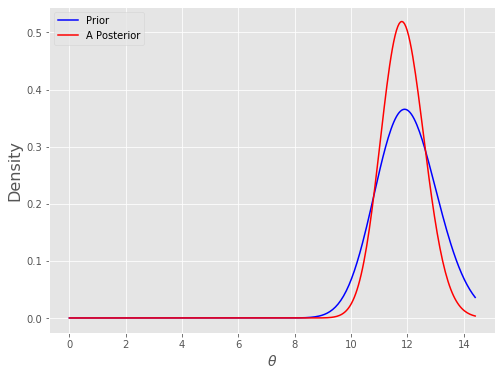

In [21]:
thetas = np.linspace(0.001, ubA+1, 300)
plt.figure(figsize=(8, 6))
plt.style.use('ggplot')
plt.plot(thetas, priorA.pdf(thetas), label='Prior', c='blue')
plt.plot(thetas, postA.pdf(thetas), label='A Posterior', c='red')
plt.xlabel(r'$\theta$', fontsize=14)
plt.ylabel('Density', fontsize=16)
plt.legend();

**Group B Bayesian Analysis**

In [22]:
# posterior mean (Group B)
(aB+syB)/(bB+nB)

8.928571428571429

In [23]:
# posterior mode (Group B)
(aB+syB-1)/(bB+nB)

8.857142857142858

In [24]:
# posterior 95% CI (Group B)
# upper and lower bounds
lbB = gamma.ppf(0.025, aB+syB, scale=1/(bB+nB))
ubB = gamma.ppf(0.975, aB+syB, scale=1/(bB+nB))
(lbB,ubB)

(7.432064219464302, 10.560308149242363)

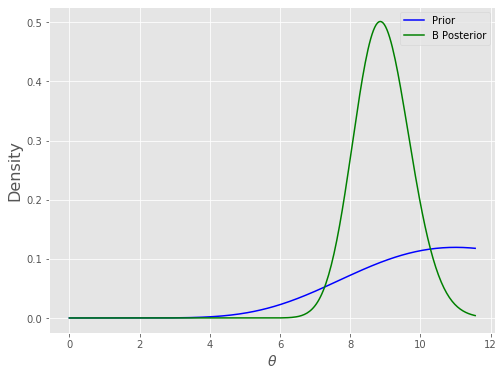

In [27]:
thetas = np.linspace(0.001, ubB+1, 300)
plt.figure(figsize=(8, 6))
plt.style.use('ggplot')
plt.plot(thetas, priorB.pdf(thetas), label='Prior', c='blue')
plt.plot(thetas, postB.pdf(thetas), label='B Posterior', color='green')

plt.xlabel(r'$\theta$', fontsize=14)
plt.ylabel('Density', fontsize=16)
plt.legend();

**Comparing Two Posterior Distributions**

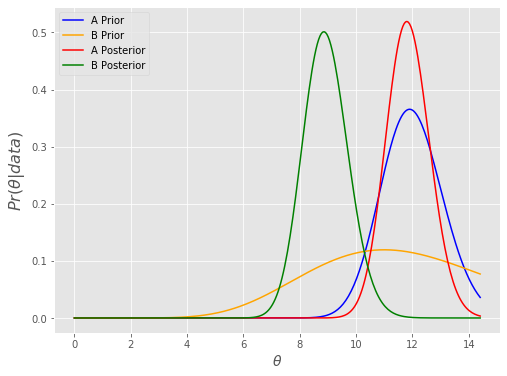

In [28]:
thetas = np.linspace(0.001, ubA+1, 300)
plt.figure(figsize=(8, 6))
plt.style.use('ggplot')
plt.plot(thetas, priorA.pdf(thetas), label='A Prior', c='blue')
plt.plot(thetas, priorB.pdf(thetas), label='B Prior', c='orange')
plt.plot(thetas, postA.pdf(thetas), label='A Posterior', c='red')
plt.plot(thetas, postB.pdf(thetas), label='B Posterior', c='green')
plt.xlabel(r'$\theta$', fontsize=14)
plt.ylabel(r'$Pr(\theta|data)$', fontsize=16)
plt.legend();

**Posterior Predictive Distributions**

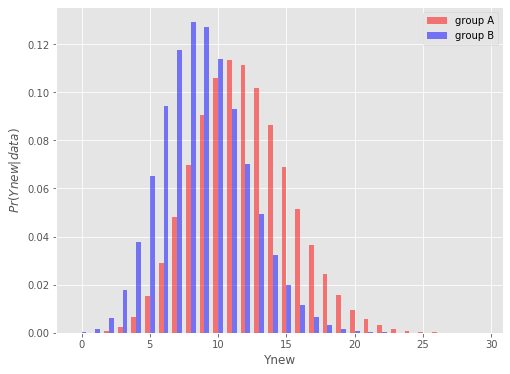

In [37]:
ynew = np.arange(30)
postpredA = st.nbinom.pmf(ynew, aA+syA, (bA+nA)/(bA+nA+1))
postpredB = st.nbinom.pmf(ynew, aB+syB, (bB+nB)/(bB+nB+1))
width = 0.35  # the width of the bars
plt.style.use('ggplot')
plt.figure(figsize=(8, 6))
plt.bar(ynew - width/2, postpredA, width, label='group A', color='red', alpha=0.5)
plt.bar(ynew + width/2, postpredB, width, label='group B', color='blue', alpha=0.5)
plt.xlabel('Ynew')
plt.ylabel(r'$Pr(Ynew|data)$')
plt.legend()
plt.show()

### b) n0가 커야 함 (near 50). 결론적으로 strong prior belief 필요

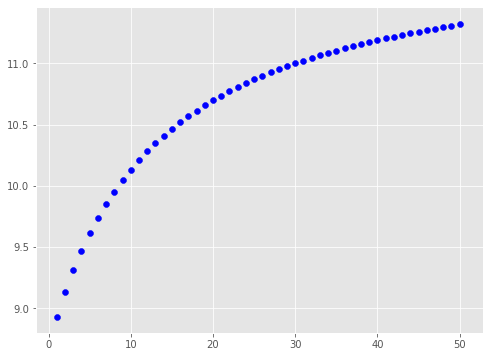

In [44]:
plt.style.use('ggplot')
plt.figure(figsize=(8, 6))
for n0 in range(1,51):
    exp = (aB*n0+syB)/(bB*n0+nB)
    plt.scatter(n0, exp, color='blue')

### c) 독립관계 성립